# Spotify Music Analysis
*Breaking down the most popular search requests by the biggest streaming platform*

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

In [2]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

## Data wrangling & cleaning

In [4]:
# Read csv generated from Spotify API
data = pd.read_csv("data/spotify_data.csv")
data.head()

FileNotFoundError: ignored

In [ ]:
# Get rows, columns and size of dataset
print("# of rows = " + str(data.shape[0]))
print("Columns = ", data.columns.tolist())
print(data.dtypes)

# of rows = 170653
Columns =  ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo']
valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object


In [ ]:
# Drop unused columns
to_drop = ['instrumentalness', 'liveness', 'mode', 'energy', 'id', 'release_date', 'key']
data.drop(to_drop, axis=1, inplace=True)

# Drop rows from before 1945
data.drop(data[data.year < 1945].index, inplace=True)

print("# of rows = " + str(data.shape[0]))
print("Columns = ", data.columns.tolist())

# of rows = 149874
Columns =  ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'explicit', 'loudness', 'name', 'popularity', 'speechiness', 'tempo']


In [ ]:
# Drop rows where artist - song are repeated, to try an account for re-releases

data.drop_duplicates(['artists', 'name'], inplace=True)

print("# of rows = " + str(data.shape[0]))
print("Columns = ", data.columns.tolist())

# of rows = 138500
Columns =  ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'explicit', 'loudness', 'name', 'popularity', 'speechiness', 'tempo']


In [ ]:
# Drop podcasts and audiobooks by filtering speechiness < 0.70

data.drop(data[data.speechiness >= 0.70].index, inplace=True)
data.drop("speechiness", axis=1, inplace=True)

print("# of rows = " + str(data.shape[0]))
print("Columns = ", data.columns.tolist())

# of rows = 136695
Columns =  ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'explicit', 'loudness', 'name', 'popularity', 'tempo']


In [ ]:
# Drop other non-song records by condition 

data.drop(data[(data.valence == 0) | (data.tempo == 0) | (data.danceability == 0)].index, inplace=True)

print("# of rows = " + str(data.shape[0]))
print("Columns = ", data.columns.tolist())

# of rows = 136557
Columns =  ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'explicit', 'loudness', 'name', 'popularity', 'tempo']


In [ ]:
# Turn duration from ms to minutes

data["duration_ms"] = data["duration_ms"] / 1000 / 60

In [ ]:
data.sample(10)

,valence,year,acousticness,artists,danceability,duration_ms,explicit,loudness,name,popularity,tempo
70292,0.3100,1996,0.004470,['Neutral Milk Hotel'],0.419,3.232883,0,-9.773,Gardenhead / Leave Me Alone,42,104.189
139863,0.1910,2015,0.000728,['League of Legends'],0.434,2.582667,0,-7.128,Get Jinxed,63,180.029
38252,0.3580,2019,0.772000,['Zach Bryan'],0.671,2.861550,1,-14.140,Heading South,71,110.051
12060,0.0388,1982,0.064700,['The Alan Parsons Project'],0.624,1.921333,0,-15.411,Sirius - Chicago Bulls Theme Song,63,111.401
9146,0.7100,1967,0.338000,['The Beatles'],0.526,2.625550,0,-9.865,Being For The Benefit Of Mr. Kite! - Remastere...,51,111.874
10953,0.6030,1976,0.394000,['Average White Band'],0.523,5.600650,0,-7.890,A Love of Your Own,47,134.517
86237,0.9620,1990,0.072300,['Johnny Gill'],0.639,5.336667,0,-11.169,Giving My All To You,34,160.293
12838,0.9630,1986,0.002500,['Huey Lewis & The News'],0.668,4.091117,0,-11.089,Hip To Be Square,65,140.873
168059,0.2270,2008,0.008840,['Coldplay'],0.162,7.110883,0,-6.277,Yes,45,161.577
152971,0.6090,2007,0.516000,"['Héctor ""El Father""', 'Jowell', 'Randy']",0.741,3.797550,0,-8.158,Hola Bebe,54,96.007


In [ ]:
data.sort_values(by="duration_ms", ascending = False)

,valence,year,acousticness,artists,danceability,duration_ms,explicit,loudness,name,popularity,tempo
138618,0.000537,2009,0.975000,['Sounds for Life'],0.1530,71.167233,0,-23.962,Brown Noise for Sleep,42,132.904
168377,0.029300,2009,0.000385,"['Lightning, Thunder and Rain Storm']",0.1160,71.156783,0,-36.638,Midnight Thunderstorm Part 2,43,94.453
55239,0.000010,2010,0.932000,['Ocean Waves For Sleep'],0.0797,68.670967,0,-17.379,Ocean Waves for Sleep,56,84.788
106689,0.000010,2010,0.932000,['One Hour Gulf Coast Ocean Waves'],0.0797,68.670967,0,-17.379,Natural White Noise for Babies - Ocean Waves f...,57,84.788
137403,0.093200,2003,0.003670,['Sleep'],0.1600,63.606217,0,-6.949,Dopesmoker,42,96.926
...,...,...,...,...,...,...,...,...,...,...,...
93735,0.975000,1945,0.994000,"['Sergei Rachmaninoff', 'William Kapell', 'Fri...",0.4410,0.298450,0,-18.048,"Rhapsody on a Theme of Paganini, Op.43: Variat...",0,82.922
157065,0.703000,1952,0.366000,"['Dizzy Gillespie', 'Charlie Parker', 'Theloni...",0.4500,0.293350,0,-13.156,Leap Frog - Take 7 / Incomplete,0,72.654
95072,0.477000,1952,0.939000,"['Johann Sebastian Bach', 'Karl Erb', 'Concert...",0.2520,0.292217,0,-28.822,"St. Matthew Passion, BWV 244 - Part One: No.9a...",0,171.199
94397,0.036400,1948,0.990000,"['Igor Stravinsky', 'Columbia Symphony Orchest...",0.3400,0.290000,0,-18.412,The Firebird Suite: Prelude and Dance of the F...,0,74.875


In [ ]:
# To filter out 'sound' records, filter outliers from inner quartiles

q1 = data['duration_ms'].quantile(.25)
q3 = data['duration_ms'].quantile(.75)
iqr = q3 - q1

In [ ]:
print("Q1 = ", q1)
print("Q3 = ", q3)
print("IQR = ", iqr)

Q1 =  2.897116666666667
Q3 =  4.464883333333333
IQR =  1.567766666666666


In [ ]:
data = data.loc[(data.duration_ms >= (q1 - 1.5 * iqr)) & (data.duration_ms <= (q3 + 1.5 * iqr))]

print("# of rows = " + str(data.shape[0]))
print("Columns = ", data.columns.tolist())

# of rows = 129471
Columns =  ['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'explicit', 'loudness', 'name', 'popularity', 'tempo']


## Exploratory Analysis

C:\Users\edube\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_ms'>

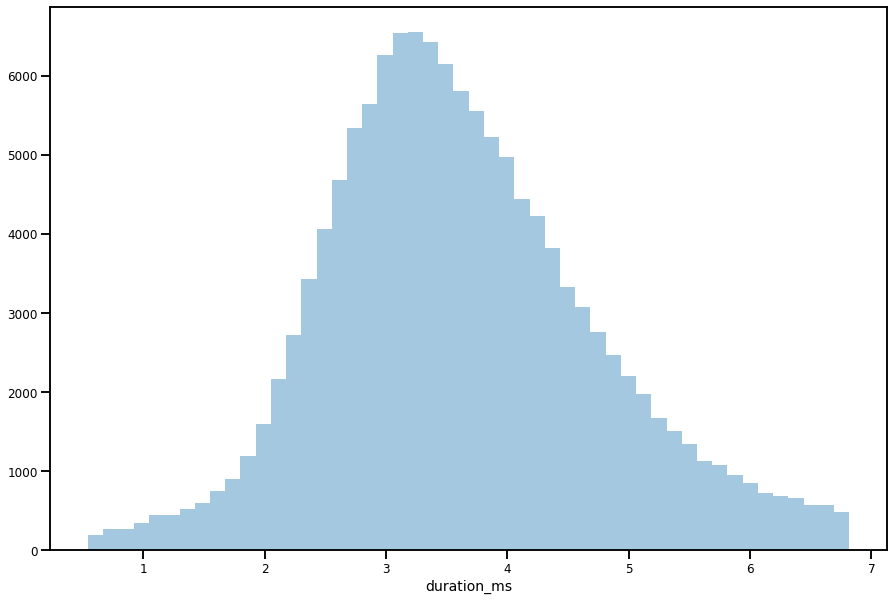

In [ ]:
sns.distplot(data.duration_ms, kde=False)

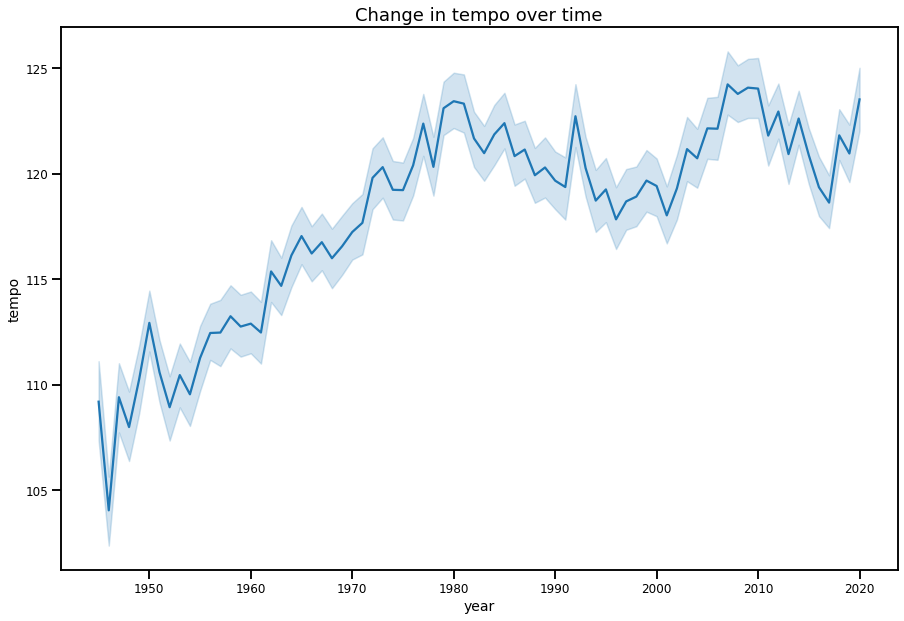

In [ ]:
ax = sns.lineplot(x="year", y="tempo", data=data)
ax.set_title("Change in tempo over time")
ax.figure.savefig("year_tempo.png")

The average tempo of popular songs has been steadily increasing.

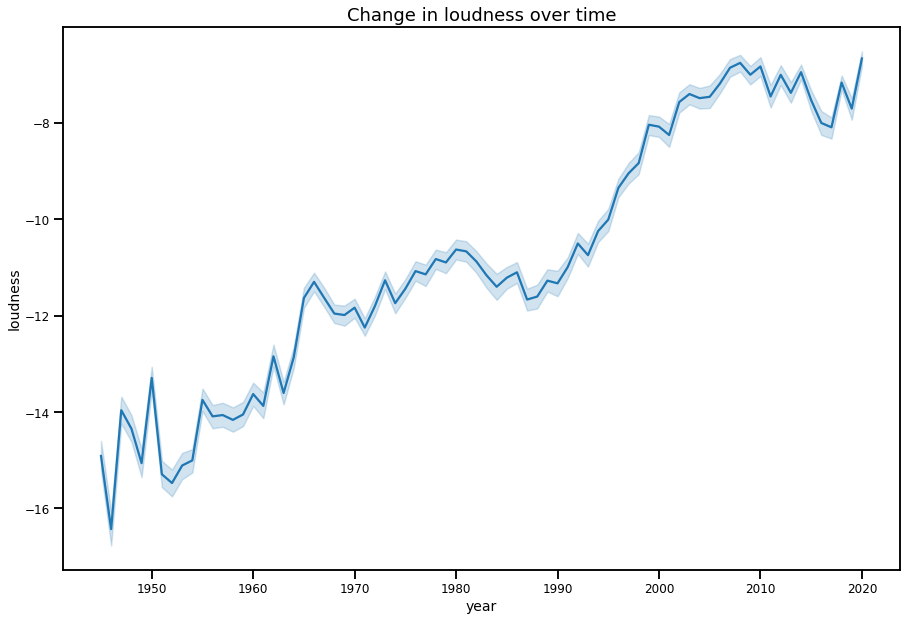

In [ ]:
ax = sns.lineplot(x="year", y="loudness", data=data)
ax.set_title("Change in loudness over time")
ax.figure.savefig("year_loudness.png")

The average loudness of songs has been steadily increasing. The "Loudness Wars" generate a big increase in the 90's.

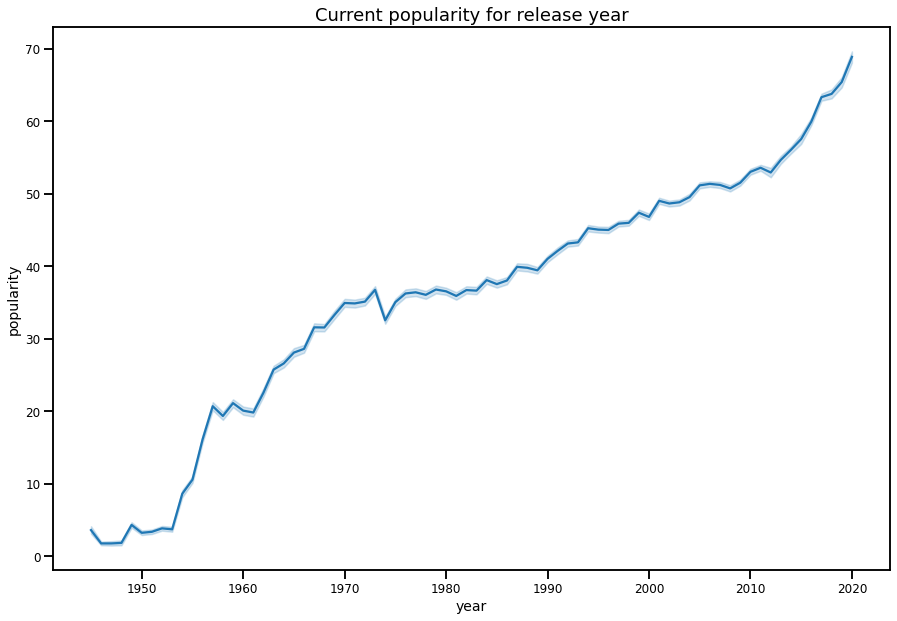

In [ ]:
ax = sns.lineplot(x="year", y="popularity", data=data)
ax.set_title("Current popularity for release year")
ax.figure.savefig("year_popularity.png")

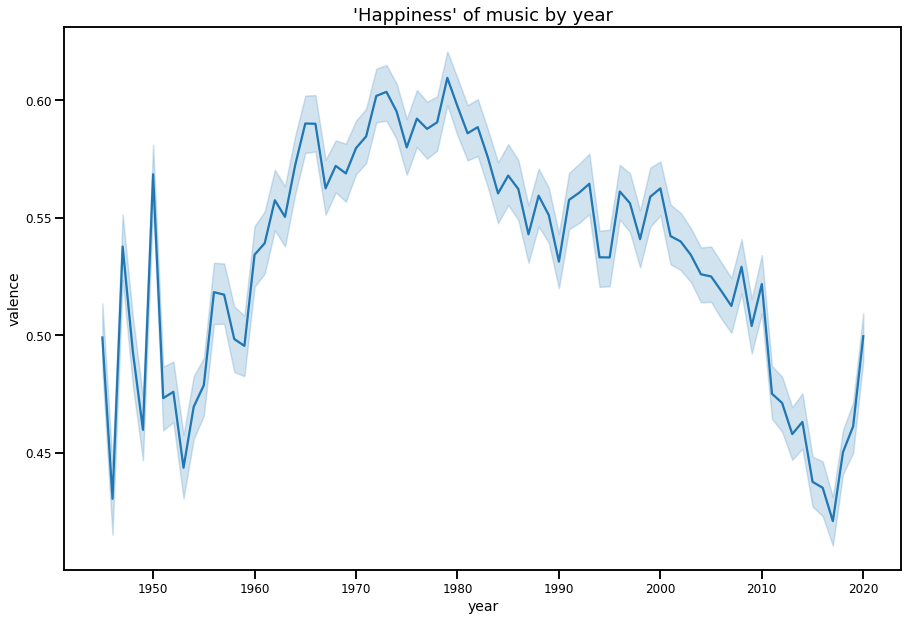

In [ ]:
ax = sns.lineplot(x="year", y="valence", data=data)
ax.set_title("'Happiness' of music by year")
ax.figure.savefig("year_valence.png")

Huge deep in percieved happiness in the 2010's. Might be related to the economic crisis, or the political climate in the U.S.

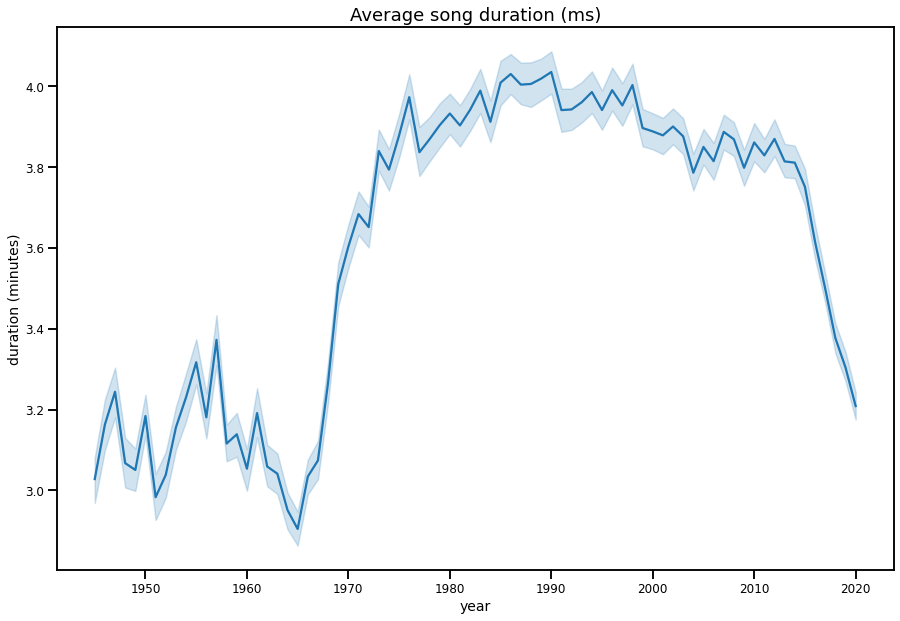

In [ ]:
ax = sns.lineplot(x="year", y="duration_ms", data=data)
ax.set_title("Average song duration (ms)")
ax.set_ylabel("duration (minutes)")
ax.figure.savefig("year_duration.png")

Massive increase in duration of songs during the 70's (might be correlated with the birht of the night club), with a huge dip in the streaming era.

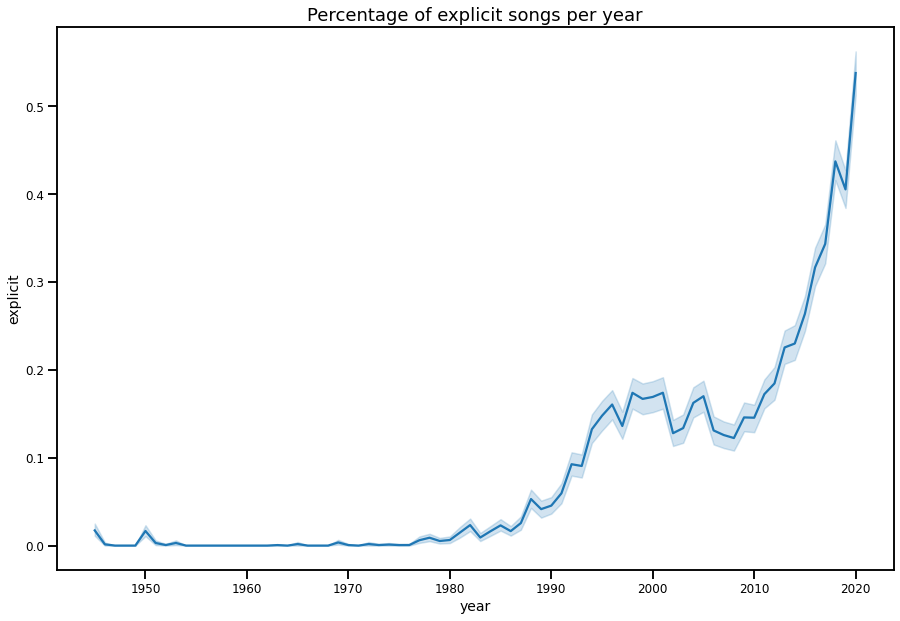

In [ ]:
ax = sns.lineplot(x="year", y="explicit", data=data)
ax.set_title("Percentage of explicit songs per year")
ax.figure.savefig("year_explicit.png")

Less restrictions and artistic freedoms allow for more explicit music to be accepted in the mainstream.

Text(0.5, 1.0, 'Danceability over time')

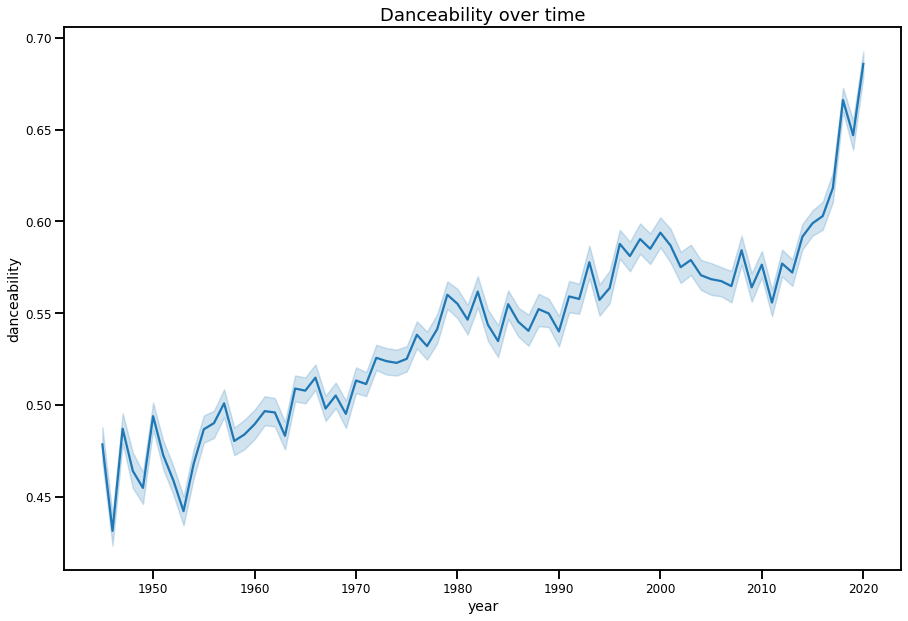

In [ ]:
ax = sns.lineplot(x="year", y="danceability", data=data)
ax.set_title("Danceability over time")
# ax.figure.savefig("year_explicit.png")

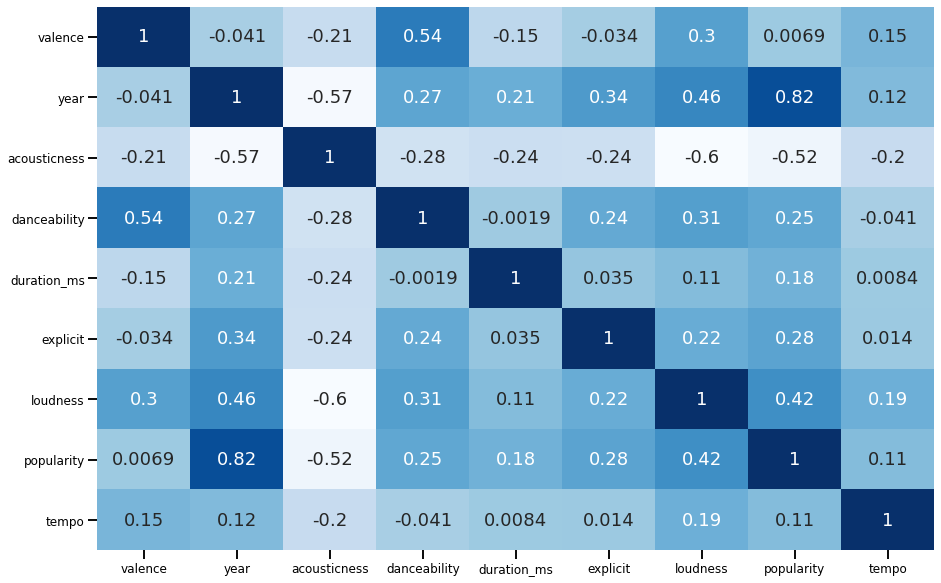

In [ ]:
ax = sns.heatmap(data.corr(), annot=True, cbar=False, cmap="Blues")
ax.figure.savefig("corr.png")

Strong correlation between popularity and year of release: a.k.a, recent songs tend to be more popular.

In [ ]:
data["artists"].value_counts()[:20]

['Frank Sinatra']                           536
['Elvis Presley']                           467
['Bob Dylan']                               414
['The Beach Boys']                          411
['Johnny Cash']                             391
['Dean Martin']                             383
['Ella Fitzgerald']                         329
['Queen']                                   326
['The Beatles']                             324
['Fleetwood Mac']                           322
['The Rolling Stones']                      320
['Lata Mangeshkar']                         293
['Vicente Fernández']                       242
['Johann Sebastian Bach', 'Glenn Gould']    240
['Nina Simone']                             218
['Miles Davis']                             214
['The Kinks']                               200
['Nat King Cole']                           199
['The Who']                                 194
['Led Zeppelin']                            190
Name: artists, dtype: int64

## Hypothesis testing
Applying probability tests to our data set.

In [ ]:
# Hypthesis testing
from scipy.stats import binom
from scipy.stats import norm

Mean =  3.616617886502239
Std =  1.1137574562874817
Prob of duration < 2.5 minutes = 15.803461%


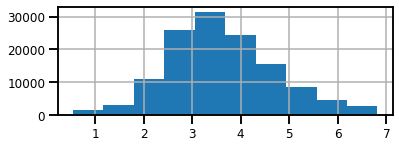

In [ ]:
# 1. Prob. of duration lower than 2.5 minutes
data.duration_ms.hist(figsize=(6,2))

mean = data.duration_ms.mean()
std = data.duration_ms.std()


print("Mean = ", mean)
print("Std = ", std)
pdf_prob = (norm.cdf(2.5, loc=mean, scale=std)) * 100

percent = ("%f%%" % pdf_prob)
print("Prob of duration < 2.5 minutes = " + percent)


Mean =  0.5413757799043908
Std =  0.17417645179178232
Prob of danceability > 0.6 = 36.821696%


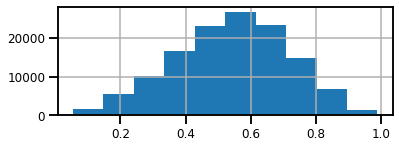

In [ ]:
# 2. Prob. of danceability higher than 0.6
data.danceability.hist(figsize=(6,2))

mean = data.danceability.mean()
std = data.danceability.std()


print("Mean = ", mean)
print("Std = ", std)
pdf_prob = (1- norm.cdf(0.6, loc=mean, scale=std)) * 100

percent = ("%f%%" % pdf_prob)
print("Prob of danceability > 0.6 = " + percent)


Mean =  0.5413757799043908
Std =  0.17417645179178232
Prob of danceability > 0.6 = 36.821696%


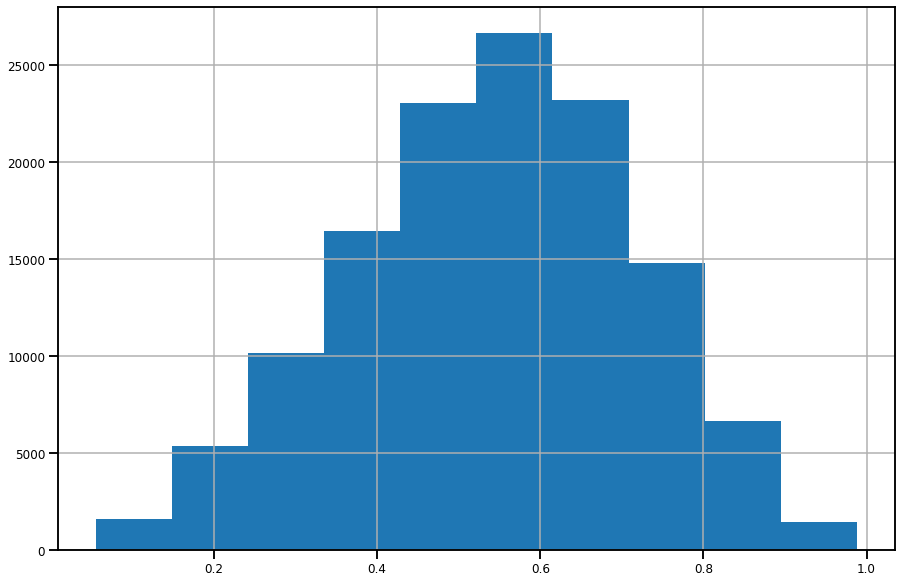

In [ ]:
# 3. Prob. of 3 non 
data.danceability.hist()

prob = 1 - binom.cdf(520, 1000, 0.5)

mean = data.danceability.mean()
std = data.danceability.std()


print("Mean = ", mean)
print("Std = ", std)
pdf_prob = (1- norm.cdf(0.6, loc=mean, scale=std)) * 100

percent = ("%f%%" % pdf_prob)
print("Prob of danceability > 0.6 = " + percent)

In [ ]:
prob_explicit = data.explicit.value_counts(normalize=True)[1]
print(prob_explicit)

0.08509241451753674


In [ ]:
prob = (1 - binom.cdf(1, 10, prob_explicit)) * 100 # At least 2 explicit songs = over 1 in cdf

In [ ]:
percent = ("%f%%" % prob_explicit)
print("Proportion of explicit songs in dataset = " + percent)

print("n = 10")
print("k = 2")

percent = ("%f%%" % prob)
print("Probability of getting at least 2 explicit songs from a sample of 10 = " + percent)

Proportion of explicit songs in dataset = 0.085092%
n = 10
k = 2
Probability of getting at least 2 explicit songs from a sample of 10 = 20.687001%


In [ ]:
percent

'20.687001%'